# Transformación de datos de caudal 

## Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## Carga de datos originales

In [3]:
csv = '../Datos/TotalMediciones_MargenDerecha.csv'
df = pd.read_csv(csv)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34175 entries, 0 to 34174
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Día           34175 non-null  int64  
 1   Hora          34175 non-null  object 
 2   am/pm         34175 non-null  object 
 3   Caudal (L/s)  34168 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.0+ MB
None


## Limpieza de datos.

Observación: Se modificó manualmente en el origen lo siguiente:
- Registros 1 y 2 son "am"
- Registro "20	22:41	pm	50.62" se cambia la hora por "10:41"
- Se cambian manualmente registros con outliers aparentes por posible error de transferencia. Se ajustan dividiendo por 1000

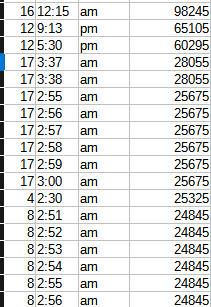


In [4]:
# función para concatenar campos de dia y hora
def unificar_fechahora(fila):
    fecha_inicial = datetime(2024, 1, 1)
    return (fecha_inicial + timedelta(days=fila['Día'] - 1)).strftime('%Y-%m-%d ') + fila['Hora'] + fila['am/pm']

# Aplicar funci[on en cada columna y convertir columna a tipo datetime]
df['fechahora'] = df.apply(unificar_fechahora, axis=1)
df['fechahora'] = pd.to_datetime(df['fechahora'], format='%Y-%m-%d %I:%M%p')

# Seleccionar columnas a usar
df = df[['fechahora', 'Caudal (L/s)']]

# Indizar por columan de fechahora
df.set_index('fechahora', inplace=True)

# Ordenar por fechahora
df = df.sort_index()

In [5]:
print(df)

# Verificar si el índice está ordenado
ordenado = df.index.is_monotonic_increasing

print(f"\ndataFrame ordenado por fechahora? {ordenado}")

                     Caudal (L/s)
fechahora                        
2024-01-01 00:00:00     35.840000
2024-01-01 00:01:00     35.920000
2024-01-01 00:02:00     36.480000
2024-01-01 00:03:00     36.560000
2024-01-01 00:04:00     38.100000
...                           ...
2024-02-10 11:00:00     81.595193
2024-02-10 11:05:00     81.595193
2024-02-10 11:10:00     81.595193
2024-02-10 11:15:00     81.990550
2024-02-10 11:20:00     81.990550

[34175 rows x 1 columns]

dataFrame ordenado por fechahora? True


In [6]:
# Función de graficación de series
def graficar(titulo, df):
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Caudal (L/s)'], marker='o', linestyle='-', color='b')
    plt.title(titulo)
    plt.xlabel('Fechahora')
    plt.ylabel('Caudal (L/s)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout() 
    plt.show()

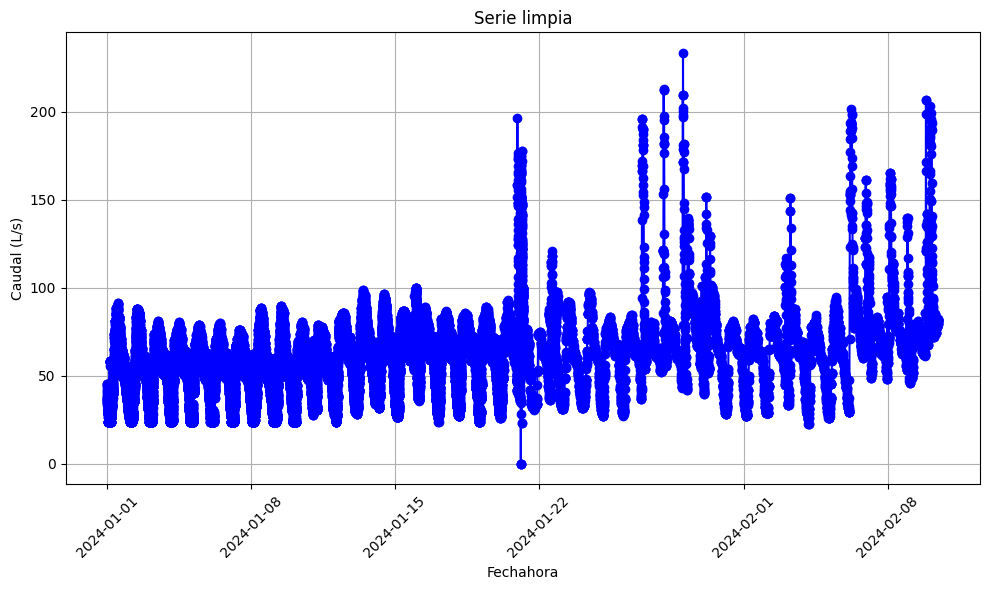

In [7]:
# Veriicar limpieza
graficar('Serie limpia', df)

## Acumulación de lecturas

In [8]:
# Acumular cada 5 minutos calculando el promedio de cada intervalo

df_acumulado = df.resample('5min').mean()
print(df_acumulado)

                     Caudal (L/s)
fechahora                        
2024-01-01 00:00:00     36.580000
2024-01-01 00:05:00     44.032000
2024-01-01 00:10:00     41.180000
2024-01-01 00:15:00     35.366000
2024-01-01 00:20:00     32.768000
...                           ...
2024-02-10 11:00:00     81.595193
2024-02-10 11:05:00     81.595193
2024-02-10 11:10:00     81.595193
2024-02-10 11:15:00     81.990550
2024-02-10 11:20:00     81.990550

[11657 rows x 1 columns]


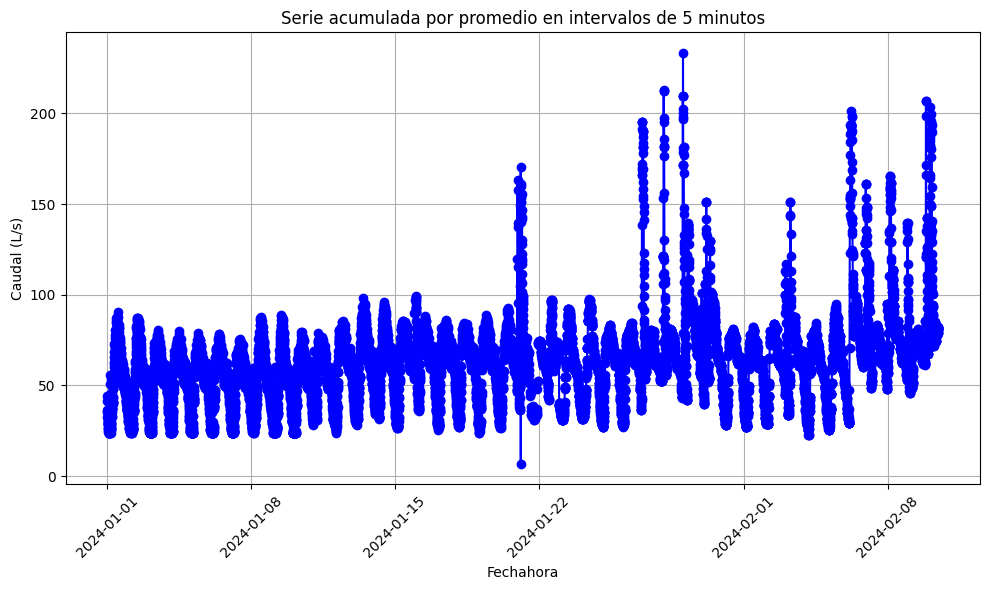

In [9]:
# Verificar serie acumulada
graficar('Serie acumulada por promedio en intervalos de 5 minutos', df_acumulado)

## Guardar resultado

In [10]:
df_acumulado.to_csv('../Resultados/Acumulado_5min_promedio.csv')